<a href="https://colab.research.google.com/github/JulienJ-44/rakuteam/blob/main/11_bis_Vote_3_mod%C3%A8les_ypred_proba_text_0_82_img_0_55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
# Connection au google drive 
from google.colab import drive
drive.mount('/Drive')
pathSaveCsv = '/Drive/My Drive'

Drive already mounted at /Drive; to attempt to forcibly remount, call drive.mount("/Drive", force_remount=True).


In [199]:
#set PARAMETERS
model_index = 1#input("Select a model: 1-RF, 2-CNN image, 3-DNN texte, default-weighted voting")
print(model_index)

1


In [200]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import requests
import io

In [201]:
def load_df_code_designation():
  url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/Streamlit_rakuten/Demo/df_classes_avec_code_libelle_code026.csv"
  download = requests.get(url).content
  df = pd.read_csv(io.StringIO(download.decode('utf-8')), index_col=0)
  return df

df_code_designation = load_df_code_designation()

In [249]:
def display_keywords(name_classe_reelle, name_classe_predite):
  dataf_code_designation=load_df_code_designation()
  classe_reelle_code026=dataf_code_designation[dataf_code_designation["désignation"]==name_classe_reelle].code_0a26
  classe_predite_code026=(dataf_code_designation[dataf_code_designation["désignation"]==name_classe_predite]).code_0a26
  classe_reelle_code=dataf_code_designation[dataf_code_designation["désignation"]==name_classe_reelle].prdtypecode
  classe_predite_code=(dataf_code_designation[dataf_code_designation["désignation"]==name_classe_predite]).prdtypecode

  import pickle

  # reading the dictionnary des 15 keyword
  with open(f'{pathSaveCsv}/dico_keywords_tfidf_15.pkl', 'rb') as handle: 
    data = handle.read() 
  # reconstructing the data as dictionary 
  lst_keywords_byclass = pickle.loads(data) 

  #print("Classe:",classe_reelle_code, " ", classe_reelle_code026)
  #print(lst_keywords_byclass[int(classe_reelle_code)])
  #print("Classe:",classe_predite_code, " ", classe_predite_code026)
  #print(lst_keywords_byclass[int(classe_predite_code)])
  #df_comparekeywords[classe_reelle_code]=lst_keywords_byclass[int(classe_reelle_code)]
  df_comparekeywords=pd.DataFrame(index=np.arange(15))
  df_comparekeywords[classe_reelle_code]=[key for key in lst_keywords_byclass[int(classe_reelle_code)]]
  #df_comparekeywords[classe_reelle_code+"_"]=[lst_keywords_byclass[key] for key in lst_keywords_byclass[int(classe_reelle_code)]]
  df_comparekeywords[classe_predite_code]=[key for key in lst_keywords_byclass[int(classe_predite_code)]]
  #df_comparekeywords[classe_predite_code+"_"]=[lst_keywords_byclass[key] for key in lst_keywords_byclass[int(classe_predite_code)]]
  return (df_comparekeywords)


In [203]:
def get_ytest():
  url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_test.csv"# Make sure the url is the raw version of the file on GitHub
  download = requests.get(url).content
  y_test = pd.read_csv(io.StringIO(download.decode('utf-8')))
  # Remplacer les labels de 0 à 26
  y_test = y_test.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
        1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
        2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})
  try:
    y_test = y_test.drop('Unnamed: 0', axis =1)
  except:
    print("(2)no columns Unnamed: 0")
  return y_test

def get_ytrain():
  url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_train.csv"# Make sure the url is the raw version of the file on GitHub
  download = requests.get(url).content
  y_train = pd.read_csv(io.StringIO(download.decode('utf-8')))
  # Remplacer les labels de 0 à 26
  return y_train

In [204]:
def set_model_name(model_index):
  if (model_index == "1"):
    model_selected="Random Forest"  
  elif (model_index == "2"):
    model_selected="CNN images" 
  elif (model_index == "3"):
    model_selected="DNN texte"
  else:
    model_selected="weighted voting"
  return model_selected

In [205]:
def calc_y_pred(model_index):
  if (model_index == "1"):
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_RandomForest_Global_score0_74.csv"
    download = requests.get(url).content
    y_pred_proba= pd.read_csv(io.StringIO(download.decode('utf-8')))
  elif (model_index == "2"):
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_Image_score_0_55_correct.csv"
    download = requests.get(url).content
    y_pred_proba= pd.read_csv(io.StringIO(download.decode('utf-8')))
  elif (model_index == "3"):
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_DnnText_score0_82.csv"
    download = requests.get(url).content
    y_pred_proba= pd.read_csv(io.StringIO(download.decode('utf-8')))
  else:
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_RandomForest_Global_score0_74.csv" # Make sure the url is the raw version of the file on GitHub
    download = requests.get(url).content
    y_pred_proba_rf = pd.read_csv(io.StringIO(download.decode('utf-8')))
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_DnnText_score0_82.csv" # Make sure the url is the raw version of the file on GitHub
    download = requests.get(url).content
    y_pred_proba_dnntext = pd.read_csv(io.StringIO(download.decode('utf-8')))
    url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_Image_score_0_55_correct.csv"# Make sure the url is the raw version of the file on GitHub
    download = requests.get(url).content
    y_pred_proba_img = pd.read_csv(io.StringIO(download.decode('utf-8')))
    score1_rf = 0.74
    score2_dnntext = 0.82
    score3_img = 0.58
    y_pred_proba = (score1_rf * y_pred_proba_rf + score2_dnntext * y_pred_proba_dnntext + score3_img * y_pred_proba_img) / (score1_rf + score2_dnntext + score3_img)
  # Drop les colonnes inutiles
  try:
      y_pred_proba = y_pred_proba.drop('Unnamed: 0', axis =1)
  except:
    print("(1)no columns Unnamed: 0")
  return y_pred_proba

In [206]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

def get_classifreport_crosstab(index_model):
  model_index=index_model
  y_test=get_ytest()
  y_train=get_ytrain()
  model_selected=set_model_name(index_model)
  y_pred_proba=calc_y_pred(index_model)
  #preparation des données pour le crosstab
  # Convertir Dataframe en array
  y_pred_proba_arr = y_pred_proba.to_numpy()
  y_test = y_test.to_numpy()
  # on prend l'index de la proba la + élevée
  # pour récupérer les classes
  y_pred = y_pred_proba_arr.argmax(axis=1)
  # Pour ajouter une dimension en plus
  y_pred = np.reshape(y_pred, (-1, 1))
  return(metrics.classification_report(y_test, y_pred))

#print("Evaluation détaillée de la Classification :\n \n" , get_classif_report("4"))

Heatmap:


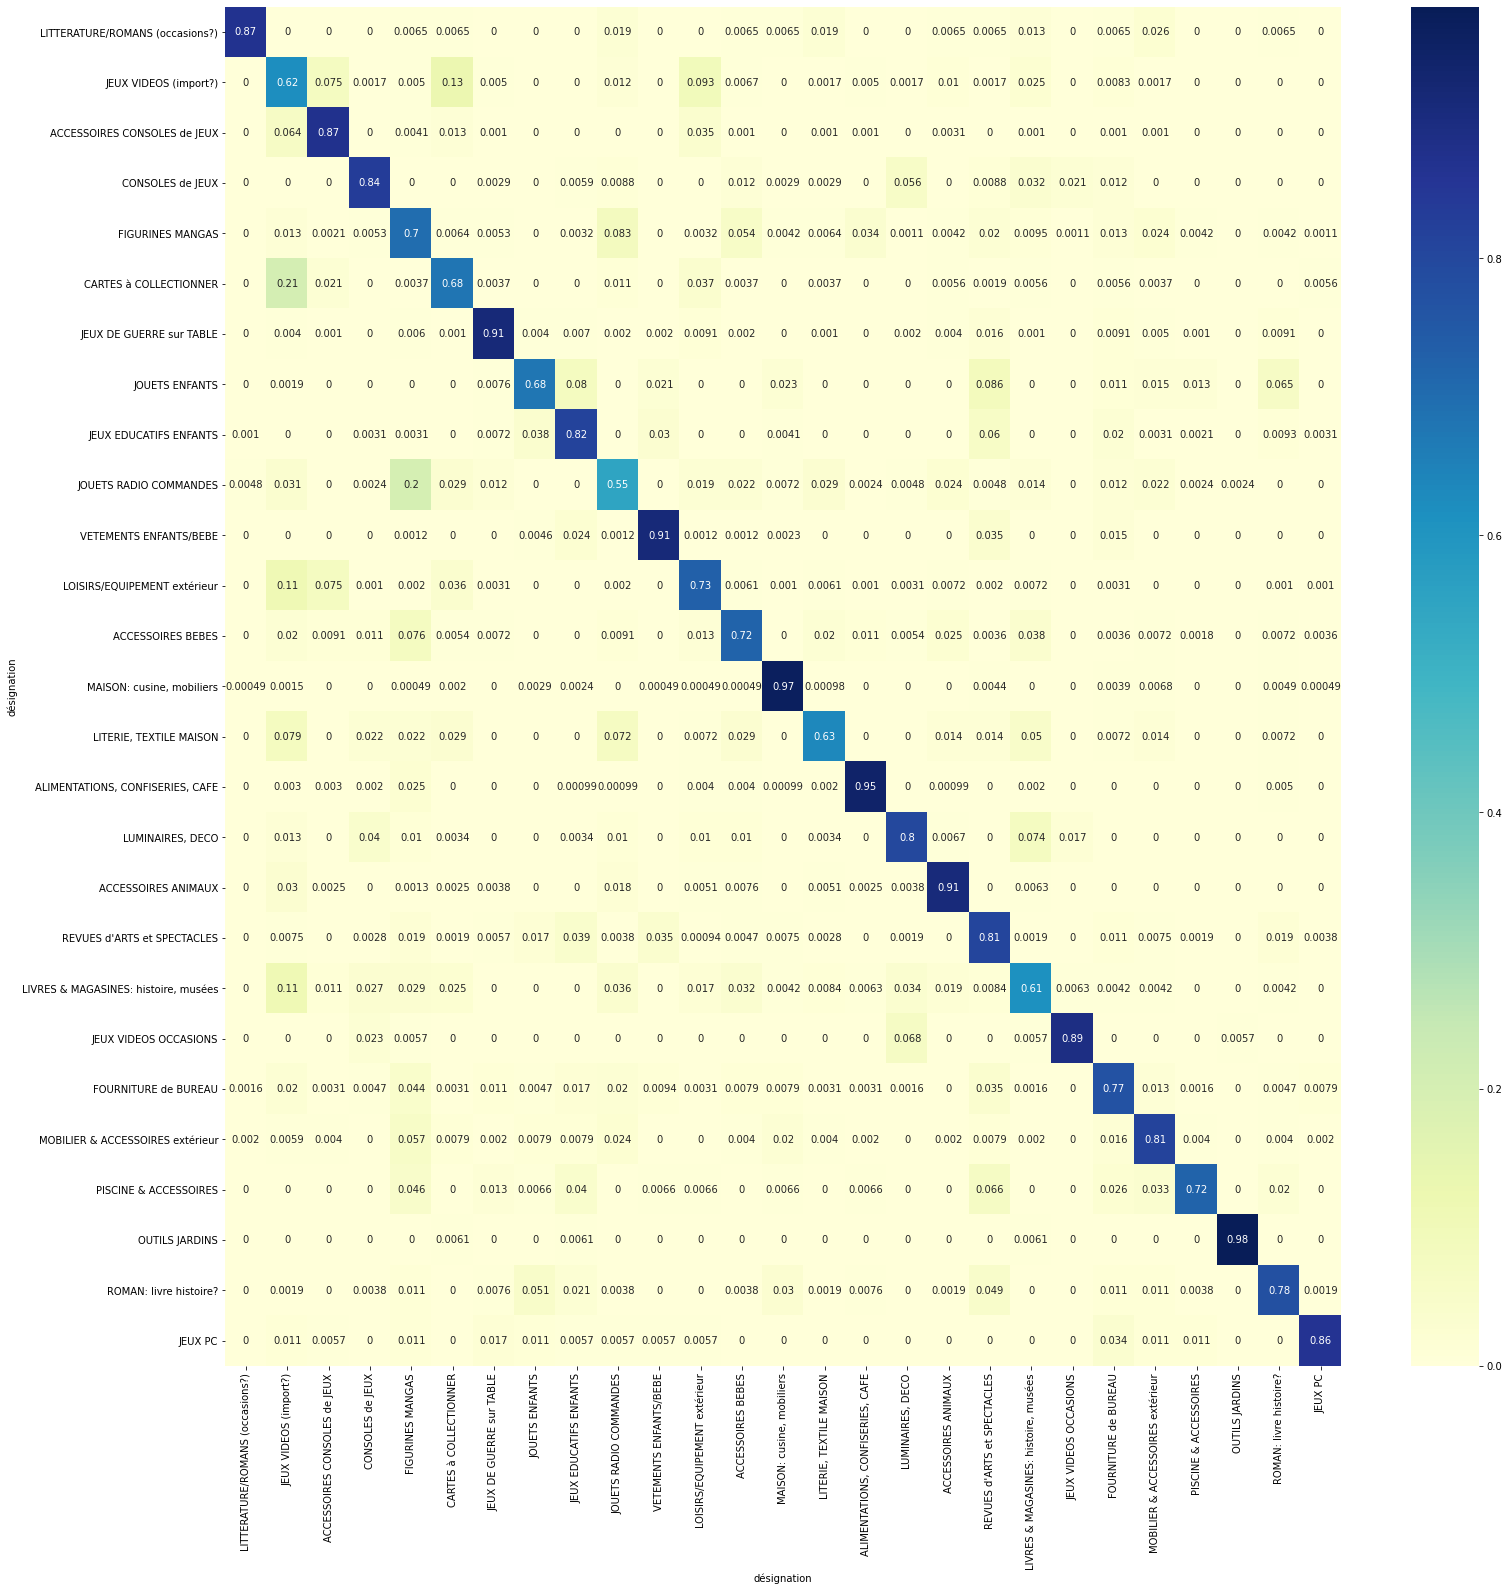

In [207]:
def get_crosstab(index_model):
  model_index=index_model
  y_test=get_ytest()
  y_train=get_ytrain()
  model_selected=set_model_name(index_model)
  y_pred_proba=calc_y_pred(index_model)
  #preparation des données pour le crosstab
  # Convertir Dataframe en array
  y_pred_proba_arr = y_pred_proba.to_numpy()
  y_test = y_test.to_numpy()
  # on prend l'index de la proba la + élevée
  # pour récupérer les classes
  y_pred = y_pred_proba_arr.argmax(axis=1)
  # Pour ajouter une dimension en plus
  y_pred = np.reshape(y_pred, (-1, 1))
  # Crosstab avec ravel pr enlever dimension et eviter message d'erreur (Error: If using all scalar values, you must pass an index)
  dfcross = pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['Classe réelle'], colnames=['Classe prédite'],normalize = 0) #TODO remettre ,normalize = 0  
  dfcross = dfcross.sort_index(axis=0)
  dfcross = dfcross.sort_index(axis=1)
  df_code_designation = load_df_code_designation()
  dfcross.columns = df_code_designation['désignation']
  dfcross.index = df_code_designation['désignation']
  return dfcross

import seaborn as sns
cross=get_crosstab("3")
print("Heatmap:")
plt.figure(figsize=(25,25))
g = sns.heatmap(cross,  annot=True, cmap="YlGnBu");
plt.xticks(rotation=90);

In [208]:
#chargement de ytest et des features pour récupérer l'échantillon d articles tests utilisé pour les modèles
url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_test.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_test_analyse = pd.read_csv(io.StringIO(download.decode('utf-8')), index_col=0)

url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/Features/data_features_final.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
data_features = pd.read_csv(io.StringIO(download.decode('utf-8')))
#on garde que les données avec label (on exclut la partie X_test challenge)
data_features = data_features.dropna(subset=['prdtypecode_x'])

# Drop le Unnamed
try:
    data_features = data_features.drop('Unnamed: 0', axis =1)
except:
  print("(1)no columns Unnamed: 0")
try:
    data_features = data_features.drop('prdtypecode_y', axis =1)
except:
  print("(1)no columns prdtypecode_y")

# on regénère les mêmes échantillons que pour les modèles
X_train, X_test, y_train, y_test = train_test_split(data_features, data_features['prdtypecode_x'], test_size = 0.2, random_state = 123)
y_test_analyse['prédiction'] = y_pred
X_test=X_test.sort_index(axis=0)
#y_test_analyse=y_test_analyse.sort_index(axis=0)
#y_pred=y_pred.sort(axis=0)
y_test_analyse = y_test_analyse.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})


In [224]:
Global_df_analysis = pd.concat([X_test.drop("prdtypecode_x", axis=1),y_test_analyse], axis = 1)
ligne_erreur = Global_df_analysis[Global_df_analysis['prdtypecode']!=Global_df_analysis['prédiction']]
print("%age de champs descriptions vides parmi les erreurs:", str(ligne_erreur["description"].isna().sum()*100/len(ligne_erreur)))
#Quasiment 50% des erreurs de classfication correspondent à des articles à description vide! => amléiorer features RF sur designations

%age de champs descriptions vides parmi les erreurs: 42.41512677266867


In [245]:
#dfcross_notnorm = pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['Classe réelle'], colnames=['Classe prédite']) #TODO remettre ,normalize = 0
dfcross_notnorm = pd.crosstab(y_test_analyse.prdtypecode, y_test_analyse.prédiction, rownames=['Classe réelle'], colnames=['Classe prédite']) #TODO remettre ,normalize = 0
dfcross_notnorm = dfcross_notnorm.sort_index(axis=0)
dfcross_notnorm = dfcross_notnorm.sort_index(axis=1)
dfcross_notnorm.columns = df_code_designation['désignation']
dfcross_notnorm.index = df_code_designation['désignation']
dfcross_notnorm


désignation,LITTERATURE/ROMANS (occasions?),JEUX VIDEOS (import?),ACCESSOIRES CONSOLES de JEUX,CONSOLES de JEUX,FIGURINES MANGAS,CARTES à COLLECTIONNER,JEUX DE GUERRE sur TABLE,JOUETS ENFANTS,JEUX EDUCATIFS ENFANTS,JOUETS RADIO COMMANDES,VETEMENTS ENFANTS/BEBE,LOISIRS/EQUIPEMENT extérieur,ACCESSOIRES BEBES,"MAISON: cusine, mobiliers","LITERIE, TEXTILE MAISON","ALIMENTATIONS, CONFISERIES, CAFE","LUMINAIRES, DECO",ACCESSOIRES ANIMAUX,REVUES d'ARTS et SPECTACLES,"LIVRES & MAGASINES: histoire, musées",JEUX VIDEOS OCCASIONS,FOURNITURE de BUREAU,MOBILIER & ACCESSOIRES extérieur,PISCINE & ACCESSOIRES,OUTILS JARDINS,ROMAN: livre histoire?,JEUX PC
désignation,,,,,,,,,,,,,,,,,,,,,,,,,,,
LITTERATURE/ROMANS (occasions?),93,4,0,0,5,2,14,0,6,3,1,0,2,10,0,4,0,3,0,1,0,5,0,0,0,1,0
JEUX VIDEOS (import?),0,352,32,0,5,41,11,0,0,8,0,65,6,8,1,8,1,19,0,40,0,3,0,0,0,0,1
ACCESSOIRES CONSOLES de JEUX,0,23,812,0,2,6,6,0,0,1,0,57,5,1,1,10,1,29,2,7,0,0,0,0,0,1,0
CONSOLES de JEUX,0,9,2,209,6,1,8,1,10,6,0,1,16,11,0,3,20,2,11,11,4,3,2,0,1,4,0
FIGURINES MANGAS,1,13,5,6,614,17,18,6,8,32,2,15,56,52,0,16,2,8,22,11,0,18,13,1,0,6,2
CARTES à COLLECTIONNER,0,32,4,1,0,437,5,1,2,6,0,10,1,19,0,2,0,3,1,8,0,3,0,0,0,0,1
JEUX DE GUERRE sur TABLE,0,22,4,1,13,6,731,8,38,6,7,25,5,53,1,10,1,9,16,2,0,19,4,1,0,9,2
JOUETS ENFANTS,0,0,0,3,9,4,23,280,106,0,9,0,1,38,0,1,0,0,27,2,0,4,1,1,0,13,2
JEUX EDUCATIFS ENFANTS,0,6,1,1,25,12,16,36,717,3,25,2,3,26,0,1,1,1,69,0,0,13,1,1,0,7,0


In [246]:
cm = dfcross_notnorm
df = pd.DataFrame()

i=0
j=0
ClassVrai = []
ClassPredite = []
Erreurs = []
for i in range(len(cm)):
    for j in range(len(cm.columns)):
        if i != j:
            #if cm.iloc[i,j] > 0.05:
                ClassVrai.append(cm.index[i])
                ClassPredite.append(cm.columns[j])
                Erreurs.append(cm.iloc[i,j])
        
df = pd.DataFrame({'Classe réelle' : ClassVrai,
                    'Classe prédite' : ClassPredite,
                    '#Erreurs' : Erreurs
                    })         

In [247]:
df=df.sort_values(by='#Erreurs',ascending=False)
df.head(10)
#df_sorted[df_sorted['Classe réelle']=='FIGURINES MANGAS']

,Classe réelle,Classe prédite,#Erreurs
238,JOUETS RADIO COMMANDES,FIGURINES MANGAS,110
189,JOUETS ENFANTS,JEUX EDUCATIFS ENFANTS,106
476,REVUES d'ARTS et SPECTACLES,JEUX EDUCATIFS ENFANTS,89
663,ROMAN: livre histoire?,"MAISON: cusine, mobiliers",84
288,LOISIRS/EQUIPEMENT extérieur,ACCESSOIRES CONSOLES de JEUX,78
225,JEUX EDUCATIFS ENFANTS,REVUES d'ARTS et SPECTACLES,69
559,FOURNITURE de BUREAU,"MAISON: cusine, mobiliers",67
36,JEUX VIDEOS (import?),LOISIRS/EQUIPEMENT extérieur,65
495,"LIVRES & MAGASINES: histoire, musées",JEUX VIDEOS (import?),62
287,LOISIRS/EQUIPEMENT extérieur,JEUX VIDEOS (import?),61


In [250]:
indexrow=0
#df_code_designation
print("\n #Erreur:", df.iloc[indexrow,2])
df_keywords_compared=display_keywords(df.iloc[indexrow,0], df.iloc[indexrow,1])
print(f"\nKeywords de la classe réelle({df.iloc[indexrow,0]})/prédite({df.iloc[indexrow,1]}):")
print(df_keywords_compared)


 #Erreur: 110

Keywords de la classe réelle(JOUETS RADIO COMMANDES)/prédite(FIGURINES MANGAS):
          1300       1140
0    générique   figurine
1           rc        pop
2        drone       star
3          dji       wars
4   quadcopter      funko
5        mavic      shirt
6        avion         cm
7          fpv     figure
8       caméra        pvc
9     maquette     marvel
10     voiture  figurines
11        wifi     gundam
12         car     dragon
13         pro        mug
14    batterie      japan


In [251]:
df.groupby('Classe réelle').sum().sort_values(by='#Erreurs',ascending=False)

,#Erreurs
Classe réelle,
FIGURINES MANGAS,330
REVUES d'ARTS et SPECTACLES,313
FOURNITURE de BUREAU,291
JOUETS RADIO COMMANDES,283
ROMAN: livre histoire?,278
JEUX DE GUERRE sur TABLE,262
LOISIRS/EQUIPEMENT extérieur,258
JEUX EDUCATIFS ENFANTS,250
JEUX VIDEOS (import?),249


In [252]:
df.groupby('Classe prédite').sum().sort_values(by='#Erreurs',ascending=False)

,#Erreurs
Classe prédite,
"MAISON: cusine, mobiliers",614
JEUX EDUCATIFS ENFANTS,440
JEUX VIDEOS (import?),373
FIGURINES MANGAS,364
LOISIRS/EQUIPEMENT extérieur,330
JEUX DE GUERRE sur TABLE,311
REVUES d'ARTS et SPECTACLES,277
CARTES à COLLECTIONNER,245
ACCESSOIRES CONSOLES de JEUX,211


In [253]:
dfcross_norm = pd.crosstab(y_test_analyse.prdtypecode, y_test_analyse.prédiction, rownames=['Classe réelle'], colnames=['Classe prédite'],normalize = 0) #TODO remettre ,normalize = 0
dfcross_norm = dfcross_norm.sort_index(axis=0)
dfcross_norm = dfcross_norm.sort_index(axis=1)
dfcross_norm.columns = df_code_designation['désignation']
dfcross_norm.index = df_code_designation['désignation']
dfcross_norm

cm = dfcross_norm
df = pd.DataFrame()

i=0
j=0
ClassVrai = []
ClassPredite = []
Erreurs = []
for i in range(len(cm)):
    for j in range(len(cm.columns)):
        if i != j:
            #if cm.iloc[i,j] > 0.05:
                ClassVrai.append(cm.index[i])
                ClassPredite.append(cm.columns[j])
                Erreurs.append(cm.iloc[i,j]*100)
        
df = pd.DataFrame({'Classe réelle' : ClassVrai,
                    'Classe prédite' : ClassPredite,
                    '#Erreurs %' : Erreurs
                    })         
df=df.sort_values(by='#Erreurs %',ascending=False)
df.head(10)
#df_sorted[df_sorted['Classe réelle']=='FIGURINES MANGAS']

,Classe réelle,Classe prédite,#Erreurs %
238,JOUETS RADIO COMMANDES,FIGURINES MANGAS,26.506024
189,JOUETS ENFANTS,JEUX EDUCATIFS ENFANTS,20.229008
689,JEUX PC,"MAISON: cusine, mobiliers",17.714286
663,ROMAN: livre histoire?,"MAISON: cusine, mobiliers",15.939279
495,"LIVRES & MAGASINES: histoire, musées",JEUX VIDEOS (import?),13.052632
36,JEUX VIDEOS (import?),LOISIRS/EQUIPEMENT extérieur,10.815308
611,PISCINE & ACCESSOIRES,"MAISON: cusine, mobiliers",10.596026
559,FOURNITURE de BUREAU,"MAISON: cusine, mobiliers",10.551181
585,MOBILIER & ACCESSOIRES extérieur,"MAISON: cusine, mobiliers",9.108911
5,LITTERATURE/ROMANS (occasions?),JEUX DE GUERRE sur TABLE,9.090909


In [255]:
indexrow=0
#df_code_designation
print("\n % Erreur:", df.iloc[indexrow,2])
df_keywords_compared=display_keywords(df.iloc[indexrow,0], df.iloc[indexrow,1])
print(f"\nKeywords de la classe réelle({df.iloc[indexrow,0]})/prédite({df.iloc[indexrow,1]}):")
print(df_keywords_compared)


 % Erreur: 26.506024096385545

Keywords de la classe réelle(JOUETS RADIO COMMANDES)/prédite(FIGURINES MANGAS):
          1300       1140
0    générique   figurine
1           rc        pop
2        drone       star
3          dji       wars
4   quadcopter      funko
5        mavic      shirt
6        avion         cm
7          fpv     figure
8       caméra        pvc
9     maquette     marvel
10     voiture  figurines
11        wifi     gundam
12         car     dragon
13         pro        mug
14    batterie      japan


In [256]:
df.groupby('Classe prédite').sum().sort_values(by='#Erreurs %',ascending=False)

,#Erreurs %
Classe prédite,
"MAISON: cusine, mobiliers",127.364855
JEUX EDUCATIFS ENFANTS,76.486994
FIGURINES MANGAS,71.301904
JEUX VIDEOS (import?),66.098947
JEUX DE GUERRE sur TABLE,61.215680
LOISIRS/EQUIPEMENT extérieur,54.787094
CARTES à COLLECTIONNER,46.350838
REVUES d'ARTS et SPECTACLES,44.151301
"LIVRES & MAGASINES: histoire, musées",38.773489


In [257]:
df.groupby('Classe réelle').sum().sort_values(by='#Erreurs %',ascending=False)

,#Erreurs %
Classe réelle,
JOUETS RADIO COMMANDES,68.192771
"LITERIE, TEXTILE MAISON",53.956835
ROMAN: livre histoire?,52.751423
JOUETS ENFANTS,46.564885
FOURNITURE de BUREAU,45.826772
PISCINE & ACCESSOIRES,44.370861
JEUX VIDEOS (import?),41.430948
"LIVRES & MAGASINES: histoire, musées",41.263158
LITTERATURE/ROMANS (occasions?),39.610390
